source datamining/bin/activate

In [2]:
from probatus.interpret import ShapModelInterpreter


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('alz.csv')
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [3]:
def grab_cols(df):
    num_cols = list(df.select_dtypes(include="number"))
    cat_cols = [col for col in df.columns if col not in num_cols]
    num_but_cat = [col for col in num_cols if df[col].nunique()<25]
    cat_but_car = [col for col in cat_cols if df[col].nunique() >25]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"cat_cols = {cat_cols}")
    print(f"num_cols = {num_cols}")
    print(f"num_but_cat = {num_but_cat}")
    print(f"cat_but_car= {cat_but_car}")
    return cat_cols,num_cols,cat_but_car,num_but_cat
cat_cols,num_cols,cat_but_car,num_but_cat = grab_cols(df)

cat_cols = ['Country', 'Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level', 'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure', 'Employment Status', 'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living', 'Alzheimer’s Diagnosis', 'Education Level']
num_cols = ['Age', 'BMI', 'Cognitive Test Score']
num_but_cat = ['Education Level']
cat_but_car= []


In [4]:
df[num_cols]

,Age,BMI,Cognitive Test Score
0,90,33.0,90
1,72,29.9,65
2,86,22.9,43
3,53,31.2,81
4,58,30.0,49
...,...,...,...
74278,60,22.6,42
74279,58,30.6,42
74280,57,28.2,61
74281,73,29.0,97


In [5]:
df['Alzheimer’s Diagnosis'].value_counts()

Alzheimer’s Diagnosis
No     43570
Yes    30713
Name: count, dtype: int64

In [12]:
# Ülkelere göre Alzheimer teşhisi alan hastaların sayısını ve yüzdesini hesaplama
alzheimer_by_country = df.groupby('Country')["Alzheimer’s Diagnosis"].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).sort_values(ascending=False).reset_index()

# Sütun adını daha açıklayıcı yapalım
alzheimer_by_country.columns = ['Country', 'Alzheimer_Percentage']

# Sonuçları görelim
print(alzheimer_by_country)

         Country  Alzheimer_Percentage
0         Russia             50.449974
1          India             50.334135
2   South Africa             49.521277
3         Brazil             48.580359
4         Mexico             48.471373
5    South Korea             41.586281
6   Saudi Arabia             41.425451
7        Germany             41.082217
8             UK             40.372501
9      Australia             40.269342
10     Argentina             40.203699
11        France             40.053908
12         Spain             39.994592
13         Italy             39.339420
14           USA             38.855088
15         China             38.641425
16        Norway             34.970318
17        Sweden             34.209813
18        Canada             34.141741
19         Japan             33.937617


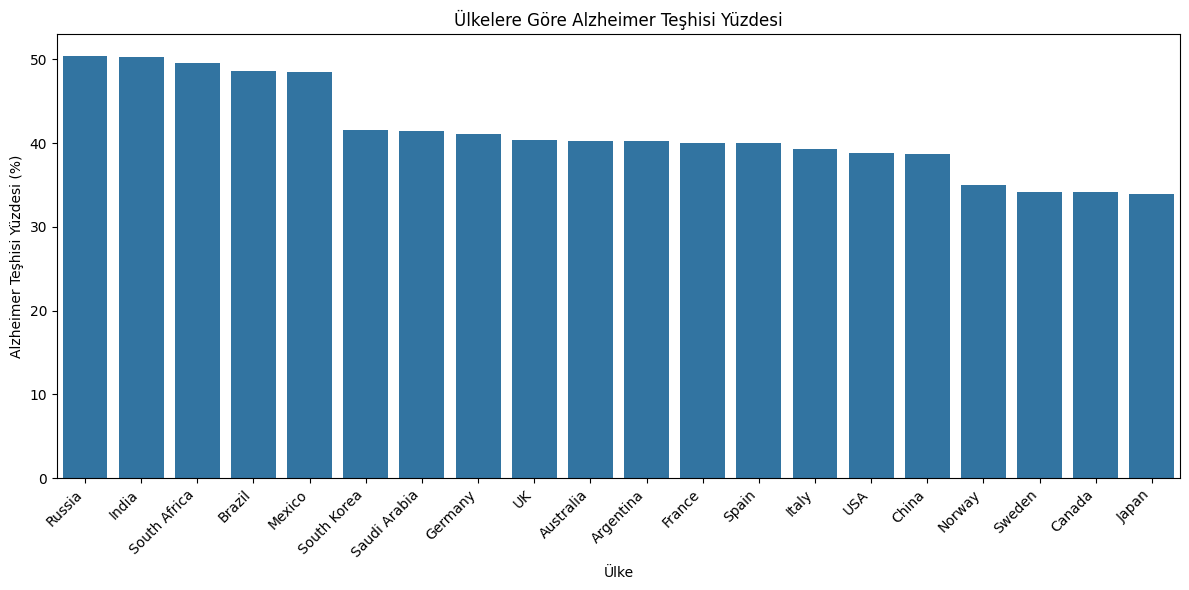

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Alzheimer_Percentage', data=alzheimer_by_country)
plt.title('Ülkelere Göre Alzheimer Teşhisi Yüzdesi')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Alzheimer Teşhisi Yüzdesi (%)')
plt.xlabel('Ülke')
plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import chi2_contingency

# Her ülke için ayrı bir kontenjans tablosu oluşturup test edin
countries = df['Country'].unique()
results = {}

for country in countries:
    # O ülkeye ait ve ait olmayan şeklinde ikiye ayırın
    contingency = pd.crosstab(df['Country'] == country, df["Alzheimer’s Diagnosis"])
    chi2, p, _, _ = chi2_contingency(contingency)
    results[country] = {'chi2': chi2, 'p_value': p}

# P değerine göre sıralayın (düşük p değeri daha güçlü ilişkiyi gösterir)
sorted_results = sorted(results.items(), key=lambda x: x[1]['p_value'])
sorted_results

[('Russia',
  {'chi2': np.float64(135.64545512406164),
   'p_value': np.float64(2.385373499414922e-31)}),
 ('India',
  {'chi2': np.float64(130.84330105188582),
   'p_value': np.float64(2.6794425503749384e-30)}),
 ('South Africa',
  {'chi2': np.float64(108.79615159046415),
   'p_value': np.float64(1.7986437479026654e-25)}),
 ('Japan',
  {'chi2': np.float64(89.08287907108445),
   'p_value': np.float64(3.78613548402091e-21)}),
 ('Brazil',
  {'chi2': np.float64(87.05136517871975),
   'p_value': np.float64(1.0573902811448824e-20)}),
 ('Canada',
  {'chi2': np.float64(83.28403107031019),
   'p_value': np.float64(7.10714194204345e-20)}),
 ('Sweden',
  {'chi2': np.float64(81.20307199982341),
   'p_value': np.float64(2.0367512182936595e-19)}),
 ('Mexico',
  {'chi2': np.float64(78.85332869780916),
   'p_value': np.float64(6.689662937729233e-19)}),
 ('Norway',
  {'chi2': np.float64(65.10359209522974),
   'p_value': np.float64(7.106241932539727e-16)}),
 ('China',
  {'chi2': np.float64(11.2674411244

In [19]:
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2/min(k-1, r-1))

countries = df['Country'].unique()
v_results = {}

for country in countries:
    contingency = pd.crosstab(df['Country'] == country, df["Alzheimer’s Diagnosis"])
    v_results[country] = cramers_v(contingency)

# Sonuçları büyükten küçüğe sıralayın
sorted_v = sorted(v_results.items(), key=lambda x: x[1], reverse=True)
print(sorted_v)

[('Russia', np.float64(0.04273246111361531)), ('India', np.float64(0.04196923264718159)), ('South Africa', np.float64(0.03827031609430157)), ('Japan', np.float64(0.03462999308596281)), ('Brazil', np.float64(0.03423285146568639)), ('Canada', np.float64(0.03348390887262939)), ('Sweden', np.float64(0.03306294329366714)), ('Mexico', np.float64(0.03258106664321004)), ('Norway', np.float64(0.029604501891627673)), ('China', np.float64(0.012315950402203606)), ('USA', np.float64(0.011378095047089924)), ('Italy', np.float64(0.009297999200495302)), ('Spain', np.float64(0.00621813125864426)), ('France', np.float64(0.005952773469131913)), ('Argentina', np.float64(0.005271357944745247)), ('Australia', np.float64(0.005004858510524928)), ('UK', np.float64(0.004430905571521776)), ('Germany', np.float64(0.0011826525406379504)), ('South Korea', np.float64(0.0010599436173650426)), ('Saudi Arabia', np.float64(0.00030455696545942664))]


In [6]:
df['Country'].value_counts()

Country
Brazil          3839
Germany         3807
Australia       3787
Russia          3778
South Africa    3760
Japan           3751
India           3741
South Korea     3732
Argentina       3731
Italy           3724
Canada          3711
France          3710
Norway          3706
Spain           3698
Sweden          3689
Saudi Arabia    3662
UK              3651
USA             3616
Mexico          3598
China           3592
Name: count, dtype: int64

In [7]:
df[df['Alzheimer’s Diagnosis'] == 'Yes']['Country'].value_counts(ascending=False)

Country
Russia          1906
India           1883
Brazil          1865
South Africa    1862
Mexico          1744
Germany         1564
South Korea     1552
Australia       1525
Saudi Arabia    1517
Argentina       1500
France          1486
Spain           1479
UK              1474
Italy           1465
USA             1405
China           1388
Norway          1296
Japan           1273
Canada          1267
Sweden          1262
Name: count, dtype: int64

In [8]:
df[df['Alzheimer’s Diagnosis'] == 'No']['Country'].value_counts(ascending=False)

Country
Japan           2478
Canada          2444
Sweden          2427
Norway          2410
Australia       2262
Italy           2259
Germany         2243
Argentina       2231
France          2224
Spain           2219
USA             2211
China           2204
South Korea     2180
UK              2177
Saudi Arabia    2145
Brazil          1974
South Africa    1898
Russia          1872
India           1858
Mexico          1854
Name: count, dtype: int64

In [9]:
yes_counts = df[df['Alzheimer’s Diagnosis'] == 'Yes']['Country'].value_counts()

total_counts = df['Country'].value_counts()

percentages = (yes_counts / total_counts * 100).sort_values(ascending=False)
percentages

Country
Russia          50.449974
India           50.334135
South Africa    49.521277
Brazil          48.580359
Mexico          48.471373
South Korea     41.586281
Saudi Arabia    41.425451
Germany         41.082217
UK              40.372501
Australia       40.269342
Argentina       40.203699
France          40.053908
Spain           39.994592
Italy           39.339420
USA             38.855088
China           38.641425
Norway          34.970318
Sweden          34.209813
Canada          34.141741
Japan           33.937617
Name: count, dtype: float64

In [10]:
pd.crosstab(df['Family History of Alzheimer’s'] , df['Alzheimer’s Diagnosis'])

Alzheimer’s Diagnosis,No,Yes
Family History of Alzheimer’s,,
No,32864,19140
Yes,10706,11573


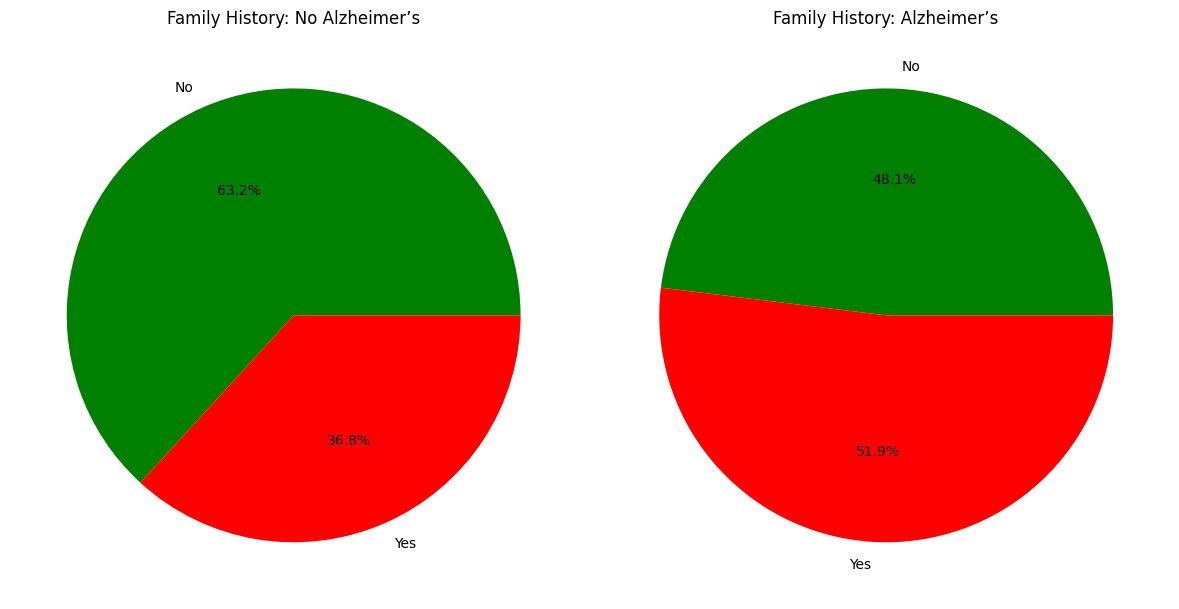

In [11]:
family_history_alzheimer = pd.crosstab(df['Family History of Alzheimer’s'], df['Alzheimer’s Diagnosis'])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(family_history_alzheimer.iloc[0], labels=family_history_alzheimer.columns, autopct='%1.1f%%', colors=['Green', 'Red'])
axes[0].set_title('Family History: No Alzheimer’s')

axes[1].pie(family_history_alzheimer.iloc[1], labels=family_history_alzheimer.columns, autopct='%1.1f%%', colors=['Green', 'Red'])
axes[1].set_title('Family History: Alzheimer’s')

plt.tight_layout()
plt.show()

In [12]:
ordinal_columns = ['Education Level', 'Physical Activity Level', 'Depression Level', 
                   'Sleep Quality', 'Dietary Habits', 'Stress Levels',"Social Engagement Level","Income Level"]

# Nominal columns to be encoded with OneHotEncoder
nominal_columns = ['Country', 'Gender', 'Smoking Status', 'Alcohol Consumption', 
                   'Diabetes', 'Hypertension', 'Cholesterol Level', 
                   'Family History of Alzheimer’s', 'Air Pollution Exposure', 
                   'Employment Status', 'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)', 
                   'Urban vs Rural Living', 'Alzheimer’s Diagnosis']

In [13]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
Country,74283,0,0.0,20
Age,74283,0,0.0,45
Gender,74283,0,0.0,2
Education Level,74283,0,0.0,20
BMI,74283,0,0.0,166
Physical Activity Level,74283,0,0.0,3
Smoking Status,74283,0,0.0,3
Alcohol Consumption,74283,0,0.0,3
Diabetes,74283,0,0.0,2
Hypertension,74283,0,0.0,2


In [14]:
def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Finding outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers
    
    return outlier_indices

numerical_columns =df.select_dtypes('number').columns.to_list()
outliers_iqr = detect_outliers_iqr(df, numerical_columns)

for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

Age: 0 outliers detected
Education Level: 0 outliers detected
BMI: 0 outliers detected
Cognitive Test Score: 0 outliers detected


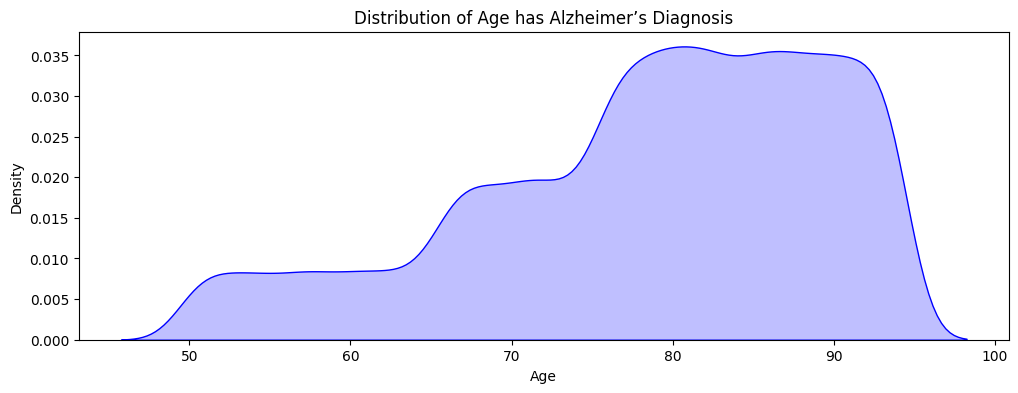

In [15]:
import seaborn as sns
plt.figure(figsize=(12, 4))

sns.kdeplot(df['Age'][df['Alzheimer’s Diagnosis'] == 'Yes'], color='blue', fill=True)
plt.title('Distribution of Age has Alzheimer’s Diagnosis')

plt.show()

In [16]:
import plotly.express as px
fig = px.pie(values = df['Physical Activity Level'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts(),
             names = df['Physical Activity Level'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts().index,
             template = 'plotly_dark',
             title = 'Is Physical Activity Level affect on Alzheimer’s Diagnosis?'
             ).update_traces(textinfo='label+percent')

fig.show()

In [17]:
fig = px.pie(values = df['Diabetes'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts(),
             names = df['Diabetes'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts().index,
             template = 'plotly_dark',
             title = 'Is Diabetes affect on Alzheimer’s Diagnosis?'
             ).update_traces(textinfo='label+percent')
fig.show()

In [18]:
import sys
print(sys.executable)

/Users/cagatayd/Desktop/miul/datamining/bin/python
